In [53]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.metrics import f1_score
import csv
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA # Principal Component Analysis module
from sklearn.cluster import KMeans # KMeans clustering 
import matplotlib.pyplot as plt # Python defacto plotting library
import seaborn as sns # More snazzy plotting library
%matplotlib inline 
from gensim.models import word2vec
from sklearn import svm

In [54]:
#Load csv data
with open("movie_metadata.csv", 'rb') as f:
    raw_data = list(csv.reader(f))
        

In [55]:
#clean the dataset by ignoring it if any column is empty or equal to 0

data = []
counter = 0
for row in raw_data:
    qualified = True
    for column in row:
        if column == " "or column == 0 or column =="0":
            qualified = False
    if qualified:
        data.append(row)
    counter = counter + 1

#the size of the current dataset right now
print len(data)

1298


In [56]:
movie = pd.read_csv('movie_metadata.csv') # reads the csv and creates the dataframe called movie
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [57]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in movie.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
    
#include the column name if applicable 
str_list.append("imdb_score")
            
#Apply Word2Vector here to take string variable into account


# Get to the numeric columns by inversion            
num_list = movie.columns.difference(str_list)  



In [58]:
movie_num = movie[num_list]
#del movie # Get rid of movie df as we won't need it now
movie_num.head()

,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,aspect_ratio,budget,cast_total_facebook_likes,director_facebook_likes,duration,facenumber_in_poster,gross,movie_facebook_likes,num_critic_for_reviews,num_user_for_reviews,num_voted_users,title_year
0,1000.0,936.0,855.0,1.78,237000000.0,4834,0.0,178.0,0.0,760505847.0,33000,723.0,3054.0,886204,2009.0
1,40000.0,5000.0,1000.0,2.35,300000000.0,48350,563.0,169.0,0.0,309404152.0,0,302.0,1238.0,471220,2007.0
2,11000.0,393.0,161.0,2.35,245000000.0,11700,0.0,148.0,1.0,200074175.0,85000,602.0,994.0,275868,2015.0
3,27000.0,23000.0,23000.0,2.35,250000000.0,106759,22000.0,164.0,0.0,448130642.0,164000,813.0,2701.0,1144337,2012.0
4,131.0,12.0,NaN,NaN,NaN,143,131.0,NaN,0.0,NaN,0,NaN,NaN,8,NaN


In [59]:
movie_num = movie_num.fillna(value=0, axis=1)
X = movie_num.values
#print movie_num.head()
# Data Normalization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

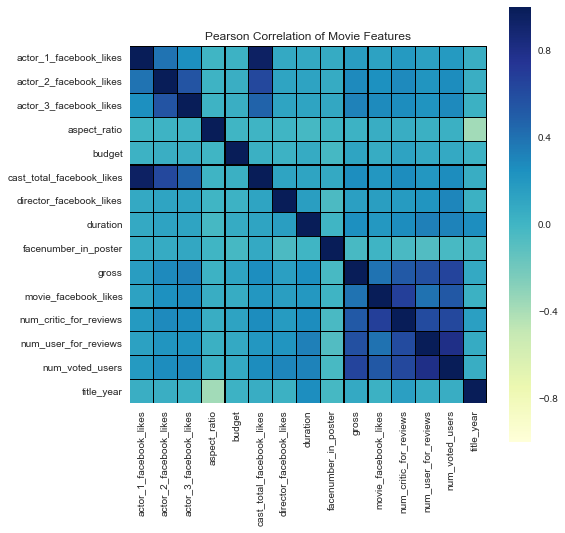

In [60]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))
plt.title('Pearson Correlation of Movie Features')
# Draw the heatmap using seaborn
sns.heatmap(movie_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='black')

#Pearson Correlation shows how does each variable corelate to each other
#1 means totally linear correlation, 0 means no correlation and -1 means totally negative linear correlation

In [61]:
#explained variance measure
# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [62]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance
print cum_var_exp

[ 29.07828324  42.4642334   51.97749171  58.74449844  65.3543267
  71.55879651  77.40265891  82.86935455  87.78203072  91.47727106
  94.35642031  97.05655844  98.91706987  99.98896    100.        ]


ValueError: incompatible sizes: argument 'height' must be length 16 or scalar

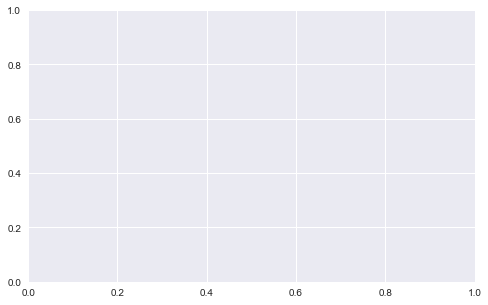

In [65]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(8, 5))
plt.bar(range(16), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(16), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()
#The graph indicates that roughly 8 PCA varaible can reach 80% accuracy
#14 PCA variables can reach 98% accuracy

In [66]:
#PCA

pca = PCA(n_components=9)
x_9d = pca.fit_transform(X_std)

#x_9d is the dataset that contains the PCA(9) of the movie variable data

In [100]:
#print movie_num.get_item[0]
#print type(movie_num)

training_set_imdb_score = movie["imdb_score"]
training_set_features = movie_num


#map(list, df.values)
#training_set = []
#map(training_set,movie_num[0:4000].values)
training_set =  movie_num[0:4000].values.tolist()
training_set_imdb_score = movie["imdb_score"][0:4000].values.T.tolist()
test_set = movie_num[4001:4999].values.tolist()

print len(training_set)
print len(training_set_imdb_score)

clf = svm.SVR()
clf.fit(training_set, training_set_imdb_score)
test_eg = test_set[0]
print test_eg
print "the prediction value is "
clf.predict(test_eg)

4000
4000
[1000.0, 177.0, 83.0, 1.85, 3500000.0, 1592.0, 0.0, 87.0, 1.0, 0.0, 3000.0, 184.0, 419.0, 49672.0, 1985.0]
the prediction value is 


/Users/Elliscope/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ 6.83424099])

In [99]:
print "the actual value is"
print movie["imdb_score"][3999]

the actual value is
7.5
